In [2]:
pip install fer

     |████████████████████████████████| 819kB 8.3MB/s 
     |████████████████████████████████| 2.3MB 17.3MB/s 


In [6]:
from fer import FER
import matplotlib.pyplot as plt 
img = plt.imread("scarlettjohansson.jpeg")
detector = FER(mtcnn=True)
print(detector.detect_emotions(img)[0]['emotions'])

{'angry': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happy': 0.98, 'sad': 0.0, 'surprise': 0.0, 'neutral': 0.02}


In [7]:
emotion, score = detector.top_emotion(img)
print(emotion,score)

happy 1.0


In [9]:
import cv2
from fer import FER
detector = FER(mtcnn=True) 
image = cv2.imread("/content/index.jpg")
result = detector.detect_emotions(image)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [11]:
bounding_box = result[0]["box"]
emotions = result[0]["emotions"]
cv2.rectangle(image,(bounding_box[0], bounding_box[1]),
(bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),(0, 155, 255), 2,)

array([[[ 75,  63,  59],
        [ 75,  63,  57],
        [ 75,  63,  57],
        ...,
        [ 74,  70,  35],
        [ 72,  70,  35],
        [ 76,  77,  45]],

       [[ 74,  62,  58],
        [ 74,  62,  56],
        [ 75,  63,  57],
        ...,
        [ 76,  71,  38],
        [ 74,  72,  38],
        [ 78,  79,  47]],

       [[ 71,  60,  56],
        [ 72,  62,  55],
        [ 74,  64,  57],
        ...,
        [ 79,  73,  44],
        [ 77,  74,  43],
        [ 82,  80,  50]],

       ...,

       [[ 94,  88,  35],
        [ 93,  88,  33],
        [ 92,  86,  33],
        ...,
        [ 19,  12,  17],
        [ 19,  12,  17],
        [ 17,  11,  16]],

       [[ 94,  88,  35],
        [ 93,  87,  34],
        [ 92,  86,  33],
        ...,
        [ 19,  12,  17],
        [ 19,  12,  17],
        [ 17,  11,  16]],

       [[101,  97,  46],
        [ 98,  94,  43],
        [ 93,  89,  38],
        ...,
        [ 19,  12,  17],
        [ 19,  12,  17],
        [ 18,  12,  17]]

In [12]:
for idx, (emotion, score) in enumerate(emotions.items()):
    color = (211, 211, 211) if score < 0.01 else (255, 0, 0)
    emotion_score = "{}: {}".format(
          emotion, "{:.2f}".format(score) if score > 0.01 else ""
        )
    cv2.putText(image,emotion_score,
            (bounding_box[0], bounding_box[1] + bounding_box[3] + 30 + idx * 15),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,1,cv2.LINE_AA,)
cv2.imwrite("emotion.jpg", image)

True

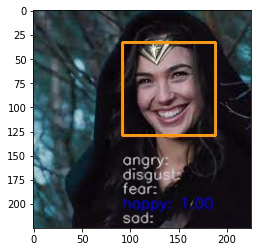

In [20]:
import matplotlib.image as mpimg
img = mpimg.imread('/content/emotion.jpg')
imgplot = plt.imshow(img)
plt.show()